In [ ]:
!pip install Tweepy

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd
import os
os.chdir('/content/drive/MyDrive/Social Media Analytics')
!pwd

/content
/content/drive/MyDrive/Social Media Analytics


In [15]:
import tweepy
import pandas as pd

In [16]:
access_token = "1221967332521713665-qVaPXbX90SqRl3Rkb9eI982WuCHgP0"
access_token_secret = "0gE2qNZVAjum7hs88gu9dP0haTeR1LFykasLk8li6rbxW"
consumer_key = "WEnSQ9hC6CI1yt5Hz6BkC0QFz"
consumer_secret = "YrTCKoHTpxfsngGxo3NrBTqZJv46o7bQS4lGr0Wx74BUHxzvJV" 

In [17]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('vaccine', count=1000)

In [22]:
for tweet in tweepy.Cursor(api.search, q='vaccines', lang="en", tweet_mode="extended").items(1000):
       print(tweet.full_text)

RT @BBCAfrica: Johnson &amp; Johnson says it will supply up to 400m doses of its vaccine to the African Union's member states.
The jab is a sin…
U.S. Is In A Race Between Vaccines And Variants, Says Public Health Expert https://t.co/Nla3dOala4 https://t.co/RmEdHWUbks
RT @kunalpurohit: Unbelieavable. Centre rejects BMC's request to allow it to go door-to-door for vaccinating 1,50,000 old and disabled citi…
PLEASE DISCUSS EFFICACY WITH YOUR ANTI-VAXXAR CONTACTS
Virus medicine works best when everyone takes it.
@CDCgov #knowledge 
https://t.co/2oIJXnmTkr
After they screwed up and undermined efforts to make covid-19 vaccines fairly and equitably available globally, why would we trust them with designing a global treaty to protect all of us? Capitalism, nationalism and greed do not protect against pandemics https://t.co/HZTWdYwO59
RT @pbhushan1: With new Vaccine resistant Covid variants creating a fresh wave, after mass vaccination; followed by fresh Lockdowns&amp;then ne…
RT @zeynepyenisey

In [18]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)


,Tweets
0,"If you, a healthy person, took a vaccine knowi..."
1,RT @justinamash: No vaccine passport. It doesn...
2,RT @TheoFleury14: Vaccine passports is the end...
3,RT @drpete00: Is there a Prime Minister for va...
4,RT @AseefaBZ: Such a relief to see my father @...
5,RT @cbkwgl: And when a company like Pfizer is ...
6,RT @justinamash: I believe a vaccine passport—...
7,RT @RedshellOW: I gotta go get my final dose o...
8,RT @MikeLoychik: Vaccine passports have no pla...
9,RT @DutchNewsNL: Fewer coronavirus vaccine app...


2021-03-30 07:22:05


In [ ]:
data.to_csv(r'vaccinetweet.txt', header=None, index=None, sep=' ', mode='a')

In [8]:
data.to_csv(r'tweetvaccine.csv')

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [26]:
import pandas as pd
pd.set_option('display.max_colwidth')

tweetv = pd.read_csv('tweetvaccine.csv', encoding='latin-1')
#messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
#messages.columns = ["label", "text"]
tweetv.head()

,Unnamed: 0,Tweets
0,0,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!
1,1,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...
2,2,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...
3,3,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine
4,4,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...


In [27]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

tweetv['tweet_clean'] = tweetv['Tweets'].apply(lambda x: remove_punct(x))

tweetv.head()

,Unnamed: 0,Tweets,tweet_clean
0,0,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!,RT AnthonySabatini BAN VACCINEPASSPORTS NOW
1,1,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...,RT iamjumpingin If we dont wake up and make stand the next thing we know the Government will ins...
2,2,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...,RT AnshulK The LibDems are set to oppose any domestic vaccine passport scheme Its been a year bu...
3,3,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine,RT cruddydre Niggas paying 200 for fake vaccine cards when itâs free to just get the vaccine
4,4,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...,RT JamesMelville A vaccinated person can still get Covid but are likely to have reduced symptoms...


In [29]:
# Define a function to split our sentences into a list of words
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

tweetv['tweet_tokenized'] = tweetv['tweet_clean'].apply(lambda x: tokenize(x.lower()))

tweetv.head()

,Unnamed: 0,Tweets,tweet_clean,tweet_tokenized
0,0,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!,RT AnthonySabatini BAN VACCINEPASSPORTS NOW,"[rt, anthonysabatini, ban, vaccinepassports, now]"
1,1,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...,RT iamjumpingin If we dont wake up and make stand the next thing we know the Government will ins...,"[rt, iamjumpingin, if, we, dont, wake, up, and, make, stand, the, next, thing, we, know, the, go..."
2,2,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...,RT AnshulK The LibDems are set to oppose any domestic vaccine passport scheme Its been a year bu...,"[rt, anshulk, the, libdems, are, set, to, oppose, any, domestic, vaccine, passport, scheme, its,..."
3,3,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine,RT cruddydre Niggas paying 200 for fake vaccine cards when itâs free to just get the vaccine,"[rt, cruddydre, niggas, paying, 200, for, fake, vaccine, cards, when, itâ, s, free, to, just, ge..."
4,4,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...,RT JamesMelville A vaccinated person can still get Covid but are likely to have reduced symptoms...,"[rt, jamesmelville, a, vaccinated, person, can, still, get, covid, but, are, likely, to, have, r..."


In [1]:
import nltk

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

tweetv['tweet_nostop'] = tweetv['tweet_tokenized'].apply(lambda x: remove_stopwords(x))

tweetv.head()

,Unnamed: 0,Tweets,tweet_clean,tweet_tokenized,tweet_nostop
0,0,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!,RT AnthonySabatini BAN VACCINEPASSPORTS NOW,"[rt, anthonysabatini, ban, vaccinepassports, now]","[rt, anthonysabatini, ban, vaccinepassports]"
1,1,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...,RT iamjumpingin If we dont wake up and make stand the next thing we know the Government will ins...,"[rt, iamjumpingin, if, we, dont, wake, up, and, make, stand, the, next, thing, we, know, the, go...","[rt, iamjumpingin, dont, wake, make, stand, next, thing, know, government, install, presidents, ..."
2,2,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...,RT AnshulK The LibDems are set to oppose any domestic vaccine passport scheme Its been a year bu...,"[rt, anshulk, the, libdems, are, set, to, oppose, any, domestic, vaccine, passport, scheme, its,...","[rt, anshulk, libdems, set, oppose, domestic, vaccine, passport, scheme, year, finally, opposition]"
3,3,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine,RT cruddydre Niggas paying 200 for fake vaccine cards when itâs free to just get the vaccine,"[rt, cruddydre, niggas, paying, 200, for, fake, vaccine, cards, when, itâ, s, free, to, just, ge...","[rt, cruddydre, niggas, paying, 200, fake, vaccine, cards, itâ, free, get, vaccine]"
4,4,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...,RT JamesMelville A vaccinated person can still get Covid but are likely to have reduced symptoms...,"[rt, jamesmelville, a, vaccinated, person, can, still, get, covid, but, are, likely, to, have, r...","[rt, jamesmelville, vaccinated, person, still, get, covid, likely, reduced, symptoms, vaccine, s..."


In [33]:

import nltk

nltk.download('vader_lexicon') 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()  

In [45]:
#sentiment analysis
listy2 = []  

for index, row in tweetv.iterrows():
  ss1 = sid.polarity_scores(row["Tweets"])
  listy2.append(ss1)
  
se1 = pd.Series(listy2)
tweetv['polarity'] = se1.values

In [46]:
tweetv.head()

,Unnamed: 0,Tweets,tweet_clean,tweet_tokenized,tweet_nostop,polarity
0,0,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!,RT AnthonySabatini BAN VACCINEPASSPORTS NOW,"[rt, anthonysabatini, ban, vaccinepassports, now]","[rt, anthonysabatini, ban, vaccinepassports]","{'neg': 0.566, 'neu': 0.434, 'pos': 0.0, 'compound': -0.7359}"
1,1,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...,RT iamjumpingin If we dont wake up and make stand the next thing we know the Government will ins...,"[rt, iamjumpingin, if, we, dont, wake, up, and, make, stand, the, next, thing, we, know, the, go...","[rt, iamjumpingin, dont, wake, make, stand, next, thing, know, government, install, presidents, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,2,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...,RT AnshulK The LibDems are set to oppose any domestic vaccine passport scheme Its been a year bu...,"[rt, anshulk, the, libdems, are, set, to, oppose, any, domestic, vaccine, passport, scheme, its,...","[rt, anshulk, libdems, set, oppose, domestic, vaccine, passport, scheme, year, finally, opposition]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,3,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine,RT cruddydre Niggas paying 200 for fake vaccine cards when itâs free to just get the vaccine,"[rt, cruddydre, niggas, paying, 200, for, fake, vaccine, cards, when, itâ, s, free, to, just, ge...","[rt, cruddydre, niggas, paying, 200, fake, vaccine, cards, itâ, free, get, vaccine]","{'neg': 0.241, 'neu': 0.614, 'pos': 0.145, 'compound': -0.296}"
4,4,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...,RT JamesMelville A vaccinated person can still get Covid but are likely to have reduced symptoms...,"[rt, jamesmelville, a, vaccinated, person, can, still, get, covid, but, are, likely, to, have, r...","[rt, jamesmelville, vaccinated, person, still, get, covid, likely, reduced, symptoms, vaccine, s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [22]:
print(tweetv['polarity'])

0                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1         {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}
2                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3       {'neg': 0.139, 'neu': 0.779, 'pos': 0.082, 'compound': -0.3182}
4          {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
                                     ...                               
996      {'neg': 0.088, 'neu': 0.797, 'pos': 0.116, 'compound': 0.1779}
997         {'neg': 0.038, 'neu': 0.898, 'pos': 0.064, 'compound': 0.0}
998        {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.6249}
999       {'neg': 0.055, 'neu': 0.878, 'pos': 0.067, 'compound': 0.168}
1000       {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.5204}
Name: polarity, Length: 1001, dtype: object


In [57]:
sid = SentimentIntensityAnalyzer()
scores = []
sentence = tweetv['Tweets'].tolist()
for sentence in tweetv['Tweets']:
    data = sid.polarity_scores(sentence)
    data['text'] = sentence
    scores += [data]
df = pd.DataFrame(scores)


,neg,neu,pos,compound,text
0,0.566,0.434,0.000,-0.7359,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!
1,0.000,1.000,0.000,0.0000,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...
2,0.000,1.000,0.000,0.0000,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...
3,0.241,0.614,0.145,-0.2960,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine
4,0.000,1.000,0.000,0.0000,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...


In [58]:
df.head(50)

,neg,neu,pos,compound,text
0,0.566,0.434,0.000,-0.7359,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!
1,0.000,1.000,0.000,0.0000,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...
2,0.000,1.000,0.000,0.0000,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...
3,0.241,0.614,0.145,-0.2960,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine
4,0.000,1.000,0.000,0.0000,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...
5,0.000,0.877,0.123,0.4215,RT @motherboard: Stanford scientists saved drops of the COVID-19 vaccine destined for the garbag...
6,0.000,0.780,0.220,0.4993,"RT @BoboMarilyn: Fauci,Brix,Biden lies.Fauci Flip-Floper,Brix liar-chief &amp; Biden can't get t..."
7,0.000,0.874,0.126,0.3182,RT @ninjaro: Malawian government ordered vaccine from Zimbabwe and a huge rock was delivered to ...
8,0.000,0.853,0.147,0.2263,RT @BBCNews: Has producing Covid vaccine been worth it for AstraZeneca? https://t.co/1jWqVlAjru
9,0.080,0.920,0.000,-0.1901,RT @KibichoiJohn: Kenya has been fighting theÂ pandemicÂ with rubber bullets but what we have ac...


In [60]:
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "neg"
    elif row.compound > cutoff:
        return "pos"
    else:
        return "neu"
        
    
df["label"] = df.apply(label_sentiment, axis=1)
df

,neg,neu,pos,compound,text,label
0,0.566,0.434,0.000,-0.7359,RT @AnthonySabatini: BAN VACCINE-PASSPORTS NOW!!!,neg
1,0.000,1.000,0.000,0.0000,RT @iamjumpingin: If we don't wake up and make stand the next thing we know the Government will ...,neu
2,0.000,1.000,0.000,0.0000,RT @Anshul__K: The @LibDems are set to oppose any domestic vaccine passport scheme. It's been a ...,neu
3,0.241,0.614,0.145,-0.2960,RT @cruddydre_: Niggas paying $200 for fake vaccine cards when itâs free to just get the vaccine,neu
4,0.000,1.000,0.000,0.0000,RT @JamesMelville: A vaccinated person can still get Covid (but are likely to have reduced sympt...,neu
...,...,...,...,...,...,...
74,0.110,0.890,0.000,-0.3818,RT @NewtonClarkeUK: If youâre getting the vaccine &amp; youâre annoyed that other people are...,neu
75,0.000,1.000,0.000,0.0000,"RT @MartinKulldorff: When making unscientific claims, media often refer to ""health officials"" or...",neu
76,0.102,0.841,0.057,-0.3044,"RT @RyanGirdusky: So just so I'm getting this straight, we'll need a vaccine passport to travel ...",neu
77,0.088,0.800,0.112,0.1531,RT @yojora: @Karovoni @MsNemah The reason it still looks organized is cos thereâs a general va...,neu


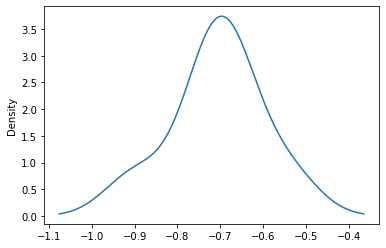

In [61]:
df[df.label=="neg"].compound.plot.kde();

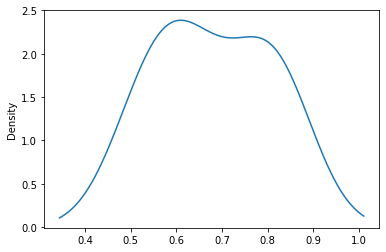

In [62]:
df[df.label=="pos"].compound.plot.kde();